**B. Compare the peak visiting times at the California branch for domestic and international visitors.**

In [ ]:
# Filteration of the reviews for California branch
california_reviews = df[df['Branch'] == 'California']


In [ ]:
california_reviews

,Review_ID,Year_Month,Reviewer_Location,Review_Text,Branch
0,148524565,2012-12,United States,"Loved seeing the Christmas lights at the park,...",California
1,346403028,2015-3,United States,I'm not sure reviewing Disneyland even has a p...,California
2,284580024,2015-6,United States,Went to Disneyland for one day. We arrive at o...,California
3,410306562,2015-12,Canada,I travelled to Disneyland from Toronto in Dece...,California
4,358484811,2015-7,United States,This place might be ok for families with kids....,California
...,...,...,...,...,...
15953,168613679,2013-7,United States,"The lines weren't that bad, even for the middl...",California
15954,186322863,2012-12,United States,"Great family trip last Dec, we had a wonderful...",California
15955,132081112,2012-6,United Kingdom,I know the review title could be misleading bu...,California
15956,367975597,2016-4,Australia,I've been to the Disneyland in Tokyo and Hong ...,California


In [ ]:
# classifying the visitors to domestic and international, here domestic are those who have United States as an entry in the Reviewer_Location, becasue California is a state in the US.
california_reviews['Visitor_Type'] = california_reviews['Reviewer_Location'].apply(lambda x: 'Domestic' if x == 'United States' else 'International')


<ipython-input-99-8cbe6d07c1be>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  california_reviews['Visitor_Type'] = california_reviews['Reviewer_Location'].apply(lambda x: 'Domestic' if x == 'United States' else 'International')


In [ ]:
california_reviews


,Review_ID,Year_Month,Reviewer_Location,Review_Text,Branch,Visitor_Type
0,148524565,2012-12,United States,"Loved seeing the Christmas lights at the park,...",California,Domestic
1,346403028,2015-3,United States,I'm not sure reviewing Disneyland even has a p...,California,Domestic
2,284580024,2015-6,United States,Went to Disneyland for one day. We arrive at o...,California,Domestic
3,410306562,2015-12,Canada,I travelled to Disneyland from Toronto in Dece...,California,International
4,358484811,2015-7,United States,This place might be ok for families with kids....,California,Domestic
...,...,...,...,...,...,...
15953,168613679,2013-7,United States,"The lines weren't that bad, even for the middl...",California,Domestic
15954,186322863,2012-12,United States,"Great family trip last Dec, we had a wonderful...",California,Domestic
15955,132081112,2012-6,United Kingdom,I know the review title could be misleading bu...,California,International
15956,367975597,2016-4,Australia,I've been to the Disneyland in Tokyo and Hong ...,California,International


In [ ]:
# Converting the Year_Month column to datetime along with setting invalid parsing as NaT
california_reviews['Year_Month'] = pd.to_datetime(california_reviews['Year_Month'], format='%Y-%m', errors='coerce')

# Dropping the rows with NaT in Year_Month column, because the visualisation can't be made without this detail and there is no point in assigning a random date to those having NaT values (here)
california_reviews = california_reviews.dropna(subset=['Year_Month'])

# Extracting the  month and year from the datetime column for the analysis
california_reviews['Year'] = california_reviews['Year_Month'].dt.year
california_reviews['Month'] = california_reviews['Year_Month'].dt.month


<ipython-input-101-3ab05c3bc208>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  california_reviews['Year_Month'] = pd.to_datetime(california_reviews['Year_Month'], format='%Y-%m', errors='coerce')
<ipython-input-101-3ab05c3bc208>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  california_reviews['Year'] = california_reviews['Year_Month'].dt.year
<ipython-input-101-3ab05c3bc208>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [ ]:
# Analyzing the peak visiting times
peak_times = california_reviews.groupby(['Visitor_Type', 'Year', 'Month']).size().reset_index(name='Count')

# Converting the retrieved data into tabular form (pivot data) for graphical representation
pivot_peak_times = peak_times.pivot_table(index=['Year', 'Month'], columns='Visitor_Type', values='Count', fill_value=0)

# Display the result
pivot_peak_times


Visitor_Type  Domestic  International
Year Month                           
2010 5             1.0            1.0
     6             2.0            2.0
     7             3.0            1.0
     8             3.0            1.0
     9             0.0            2.0
...                ...            ...
2019 1            33.0           31.0
     2            37.0           19.0
     3            46.0           25.0
     4            29.0           15.0
     5             0.0            1.0

[109 rows x 2 columns]

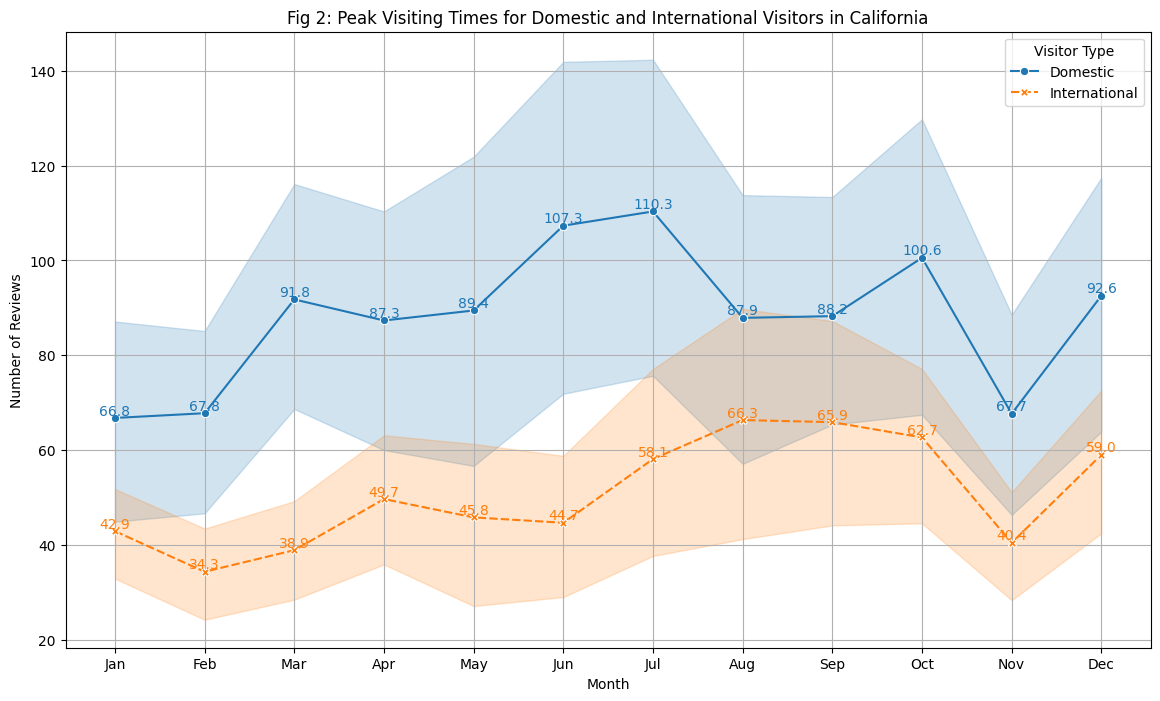

In [ ]:
# Plotting the result for B
plt.figure(figsize=(14, 8))
ax = sns.lineplot(data=peak_times, x='Month', y='Count', hue='Visitor_Type', style='Visitor_Type', markers=True)

# Plot details
plt.title('Fig 2: Peak Visiting Times for Domestic and International Visitors in California')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.legend(title='Visitor Type')
plt.grid(True)

# Setting the naming for the months instead of the numbers like Jan for 1, Feb for 2, etc...
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Annotate each point on the graph for details with the value being rounded to one decimal point
for line in ax.get_lines():
    x_data = line.get_data()[0]
    y_data = line.get_data()[1]
    for x, y in zip(x_data, y_data):
        ax.text(x, y, f'{y:.1f}', color=line.get_color(), ha='center', va='bottom', fontsize=10)

# Printing the plot
plt.show()


B. The figure 2 clearly depicts the graph expressing the peak visiting times at the California branch fr domestic and international visitors. The key takeaways in terms of differences in visiting times are as follows:
- July is the peak/ favourite month for the domestic visitor groups to visit California, because it is the month where the highest reviews were received ~ 110. Hence, the mid year time suits the states people to visit California.
- For international visitor groups August and September are the two best/ peak months to visit California, this is because around 66 reviews were received in both the months.
- The least number of reviews were recorded in the month of November for Domestic and February for International visitor groups numbering around 67 and 34 respectively.
- There are more domestic visitors than international to California throughout the year.
- Overall, January, February and November are the month with least reviews recorded from Domestic and that of February and November for international visitor groups.

Potential reasons for such differences:
- Its obvious that the domestic groups have greater flexibility to visit California than other international groups, mostly becasue of less travel time, feasible journey cost, etc. Hence, domestic groups visit more than the international ones to California.
